## Ejemplo Analisis Fondo semilla - emprendedores 2017

- La tabla visible sin la columna id
- Informar la cantidad en porcentaje de mujeres y hombres que recibieron el incentivo economico
- Que provincia fue la que tuvo mas otorgamiento?
- La media del monto otorgado
- Cual fue el monto total entregado por el gobierno?
- Cual fue el monto mayor entregado y cual el menor?
- Cual fue la region mas beneficiada en monto otorgado? (> $$)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tabla = pd.read_csv('ganadores.csv')
tabla

,id,genero_inscriptor,localidad,id_provincia,provincia,region,sector,rubro,sub_rubro,tipo_de_emprendimiento,etapa_de_desarrollo_del_proyecto,monto_otorgado
0,1,Femenino,General Pueyrredon,6,Buenos Aires,Pampeana,Industria manufacturera,Elaboracion de bebidas,"Elaboracion de cerveza, bebidas malteadas y malta",Producto,Funcional sin Ingresos,210350
1,2,Femenino,Tafi Viejo,90,Tucuman,Noroeste,Industria manufacturera,"Fabricacion de hilados y tejidos, acabado de p...","Fabricacion de hilados textiles de lana, pelos...",Producto,Funcional con Ingresos,133737
2,3,Masculino,Tafi Viejo,90,Tucuman,Noroeste,Industria manufacturera,"Fabricacion de productos de madera, corcho, pa...",Fabricacion de recipientes de madera,Producto,Funcional con Ingresos,183600
3,4,Masculino,Corrientes,18,Corrientes,Noreste,Industria manufacturera,Elaboracion de bebidas,"Elaboracion de cerveza, bebidas malteadas y malta",Producto,Funcional con Ingresos,249251
4,5,Femenino,Alderetes,90,Tucuman,Noroeste,Industria manufacturera,"Confeccion de prendas de vestir, excepto prend...","Confeccion de ropa de trabajo, uniformes y gua...",Producto,Funcional con Ingresos,232820
...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,Masculino,San Luis del Palmar,18,Corrientes,Noreste,Informacion y comunicaciones,"Procesamiento de datos, hospedaje y actividade...","Portales ""web""",Producto,Concepto / Idea,249250
183,184,Masculino,Guaymallen,50,Mendoza,Cuyo,Industria manufacturera,Impresion y servicios relacionados con la impr...,Servicios relacionados con la impresion,Mejora de Proceso Productivo,Funcional con Ingresos,210803
184,185,Masculino,Chacabuco,6,Buenos Aires,Pampeana,"Servicios artisticos, culturales, deportivos y...",Servicios para la practica deportiva,Servicios prestados por profesionales y tecnic...,Servicio,Prototipo en Desarrollo,250000
185,186,Persona juridica,Rosario,82,Santa Fe,Pampeana,Informacion y comunicaciones,Servicios de programacion y consultoria inform...,Servicios de consultores en informatica y sumi...,Producto,Prototipo en Desarrollo,250000


In [3]:
tabla.drop('id', axis=1, inplace=True)
tabla

,genero_inscriptor,localidad,id_provincia,provincia,region,sector,rubro,sub_rubro,tipo_de_emprendimiento,etapa_de_desarrollo_del_proyecto,monto_otorgado
0,Femenino,General Pueyrredon,6,Buenos Aires,Pampeana,Industria manufacturera,Elaboracion de bebidas,"Elaboracion de cerveza, bebidas malteadas y malta",Producto,Funcional sin Ingresos,210350
1,Femenino,Tafi Viejo,90,Tucuman,Noroeste,Industria manufacturera,"Fabricacion de hilados y tejidos, acabado de p...","Fabricacion de hilados textiles de lana, pelos...",Producto,Funcional con Ingresos,133737
2,Masculino,Tafi Viejo,90,Tucuman,Noroeste,Industria manufacturera,"Fabricacion de productos de madera, corcho, pa...",Fabricacion de recipientes de madera,Producto,Funcional con Ingresos,183600
3,Masculino,Corrientes,18,Corrientes,Noreste,Industria manufacturera,Elaboracion de bebidas,"Elaboracion de cerveza, bebidas malteadas y malta",Producto,Funcional con Ingresos,249251
4,Femenino,Alderetes,90,Tucuman,Noroeste,Industria manufacturera,"Confeccion de prendas de vestir, excepto prend...","Confeccion de ropa de trabajo, uniformes y gua...",Producto,Funcional con Ingresos,232820
...,...,...,...,...,...,...,...,...,...,...,...
182,Masculino,San Luis del Palmar,18,Corrientes,Noreste,Informacion y comunicaciones,"Procesamiento de datos, hospedaje y actividade...","Portales ""web""",Producto,Concepto / Idea,249250
183,Masculino,Guaymallen,50,Mendoza,Cuyo,Industria manufacturera,Impresion y servicios relacionados con la impr...,Servicios relacionados con la impresion,Mejora de Proceso Productivo,Funcional con Ingresos,210803
184,Masculino,Chacabuco,6,Buenos Aires,Pampeana,"Servicios artisticos, culturales, deportivos y...",Servicios para la practica deportiva,Servicios prestados por profesionales y tecnic...,Servicio,Prototipo en Desarrollo,250000
185,Persona juridica,Rosario,82,Santa Fe,Pampeana,Informacion y comunicaciones,Servicios de programacion y consultoria inform...,Servicios de consultores en informatica y sumi...,Producto,Prototipo en Desarrollo,250000


In [5]:
rubros= tabla.loc[:, ['provincia', 'rubro']]
rubros

,provincia,rubro
0,Buenos Aires,Elaboracion de bebidas
1,Tucuman,"Fabricacion de hilados y tejidos, acabado de p..."
2,Tucuman,"Fabricacion de productos de madera, corcho, pa..."
3,Corrientes,Elaboracion de bebidas
4,Tucuman,"Confeccion de prendas de vestir, excepto prend..."
...,...,...
182,Corrientes,"Procesamiento de datos, hospedaje y actividade..."
183,Mendoza,Impresion y servicios relacionados con la impr...
184,Buenos Aires,Servicios para la practica deportiva
185,Santa Fe,Servicios de programacion y consultoria inform...


In [6]:
rubros.groupby('provincia')['rubro'].value_counts()['Tucuman']

rubro
Fabricacion de productos de madera, corcho, paja y materiales trenzables                     4
Industrias manufactureras n.c.p.                                                             3
Confeccion de prendas de vestir, excepto prendas de piel                                     2
Curtido y terminacion de cueros; fabricacion de articulos de marroquineria y talabarteria    2
Fabricacion de hilados y tejidos, acabado de productos textiles                              2
Fabricacion de productos textiles n.c.p.                                                     2
Aserrado y cepillado de madera                                                               1
Elaboracion de bebidas                                                                       1
Elaboracion de productos alimenticios n.c.p.                                                 1
Fabricacion de partes, piezas y accesorios para vehiculos automotores y sus motores          1
Fabricacion de productos de plastico        

In [7]:
# Informar la cantidad en porcentaje de mujeres y hombres que recibieron el incentivo economico
tabla['genero_inscriptor'].unique()

array(['Femenino', 'Masculino', 'Persona juridica'], dtype=object)

In [8]:
tabla['genero_inscriptor'].value_counts()

Masculino           120
Femenino             65
Persona juridica      2
Name: genero_inscriptor, dtype: int64

In [9]:
d = dict(tabla['genero_inscriptor'].value_counts())
d

{'Masculino': 120, 'Femenino': 65, 'Persona juridica': 2}

In [12]:
total = d['Masculino'] + d['Femenino'] + d['Persona juridica']
print('El total es:', total)
print('Porcentaje de Hombres:', round((d['Masculino']/total)*100,2), '%')
print('Porcentaje de Mujeres:', round((d['Femenino']/total)*100,2), '%')

El total es: 187
Porcentaje de Hombres: 64.17 %
Porcentaje de Mujeres: 34.76 %


In [13]:
#Que provincia fue la que tuvo mas otorgamiento
tabla['provincia'].value_counts()

Chaco                              33
Buenos Aires                       33
Tucuman                            24
Cordoba                            17
Ciudad Autonoma de Buenos Aires    13
La Rioja                           10
San Juan                           10
Santa Fe                            9
Corrientes                          9
Mendoza                             9
Salta                               4
Formosa                             4
Neuquen                             2
Rio Negro                           2
Chubut                              2
Entre Rios                          2
San Luis                            2
Tierra del Fuego                    1
Santiago del Estero                 1
Name: provincia, dtype: int64

In [16]:
p = dict(tabla['provincia'].value_counts())
print(p)
print("-----------")
lista = list(p)
print(lista)
print("-----------")
print("Las provincias con mayor otorgamiento fueron:", lista[0], "y", lista[1])

{'Chaco': 33, 'Buenos Aires': 33, 'Tucuman': 24, 'Cordoba': 17, 'Ciudad Autonoma de Buenos Aires': 13, 'La Rioja': 10, 'San Juan': 10, 'Santa Fe': 9, 'Corrientes': 9, 'Mendoza': 9, 'Salta': 4, 'Formosa': 4, 'Neuquen': 2, 'Rio Negro': 2, 'Chubut': 2, 'Entre Rios': 2, 'San Luis': 2, 'Tierra del Fuego': 1, 'Santiago del Estero': 1}
-----------
['Chaco', 'Buenos Aires', 'Tucuman', 'Cordoba', 'Ciudad Autonoma de Buenos Aires', 'La Rioja', 'San Juan', 'Santa Fe', 'Corrientes', 'Mendoza', 'Salta', 'Formosa', 'Neuquen', 'Rio Negro', 'Chubut', 'Entre Rios', 'San Luis', 'Tierra del Fuego', 'Santiago del Estero']
-----------
Las provincias con mayor otorgamiento fueron: Chaco y Buenos Aires


In [18]:
#La media del monto otorgado
media = tabla['monto_otorgado'].mean()
print("La media del monto otorgado es: $", round(media,2))

La media del monto otorgado es: $ 226713.46


In [19]:
# Cual fue el monto total entregado por el gobierno?
monto_total = tabla['monto_otorgado'].sum()
print("El monto total otorgado es: $", monto_total)

El monto total otorgado es: $ 42395417


In [20]:
#Cual fue el monto mayor entregado y cual el menor?
monto_mayor = tabla['monto_otorgado'].max()
monto_menor = tabla['monto_otorgado'].min()
print("El monto mayor otorgado es: $", monto_mayor)
print("El monto menor otorgado es: $", monto_menor)

El monto mayor otorgado es: $ 250000
El monto menor otorgado es: $ 45800


In [21]:
#Cual fue la region mas beneficiada en monto otorgado? (> $$)
regiones = tabla.groupby('region')['monto_otorgado'].sum()
regiones

region
Cuyo          7277802
Noreste      10627004
Noroeste      6283475
Pampeana     16521965
Patagonia     1685171
Name: monto_otorgado, dtype: int64

In [24]:
dregiones = dict(regiones)
print(dregiones)
print("-------------")
lista_regiones = list(dregiones)
print(lista_regiones)
print("-------------")
monto = []
for aux in lista_regiones:
    monto.append(dregiones[aux])
print(monto)

{'Cuyo': 7277802, 'Noreste': 10627004, 'Noroeste': 6283475, 'Pampeana': 16521965, 'Patagonia': 1685171}
-------------
['Cuyo', 'Noreste', 'Noroeste', 'Pampeana', 'Patagonia']
-------------
[7277802, 10627004, 6283475, 16521965, 1685171]


<BarContainer object of 5 artists>

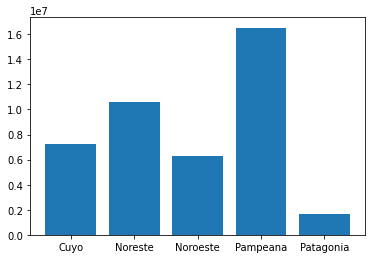

In [25]:
plt.bar(lista_regiones, monto)